In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd


In [3]:
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")

train_data= np.loadtxt("train.csv", skiprows=1, delimiter = ",")
test_data= np.loadtxt("test.csv", skiprows=1, delimiter = ",")

train_data

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [7., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.]])

In [4]:
import pandas as pd
#test_data1= np.loadtxt("test.csv", skiprows=1, delimiter = ",")
#pd.DataFrame(test_data1[:,1:])
pd.read_csv("test.csv")

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
x_test = test_data[:,:]
test_points = test_data.shape[0]

x_test = x_test.reshape(test_points, 28, 28, 1)


In [55]:
print(type(train_data))
training_till = 42000  #made it so all goes into training ,,,, didnt know we could split it in fit

train_points = train_data[:training_till].shape[0]
validation_points = train_data[training_till:].shape[0]

y_train = train_data[:, 0][:training_till]
x_train = train_data[:, 1:][:training_till]

y_validation = train_data[:, 0 ][training_till:]
x_validation = train_data[:, 1:][training_till:]

x_train = x_train.reshape( train_points, 28, 28, 1)
y_train = tf.keras.utils.to_categorical(y_train)

x_train = x_train/255
x_test = x_test/255

# x_validation = x_validation.reshape( validation_points, 28, 28, 1)
# y_validation = tf.keras.utils.to_categorical(y_validation)

kernal_size = 3
input_shape = x_train.shape[1:]
print(input_shape)

<class 'numpy.ndarray'>
(28, 28, 1)


In [56]:
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs['val_acc'] > 0.93:
            self.model.stop_training = True

In [57]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, kernal_size, padding = "same", input_shape = input_shape),
    tf.keras.layers.Conv2D(32, kernal_size, padding = "same", input_shape = input_shape),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

opt = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics = ['acc'], )
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 28, 28, 32)        18464     
_________________________________________________________________
flatten_12 (Flatten)         (None, 25088)             0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)               3211392   
_________________________________________________________________
dense_25 (Dense)             (None, 10)                1290      
Total params: 3,231,786
Trainable params: 3,231,786
Non-trainable params: 0
_________________________________________________________________


In [59]:
model.fit(x_train, y_train, epochs = 100, validation_split = 0.1, batch_size = 3150, callbacks = [MyCallback()])

Epoch 1/100
11/12 [==========================>...] - ETA: 2s - loss: 0.2360 - acc: 0.9319

KeyboardInterrupt: 

In [47]:
y = model.predict(x_test, verbose = 1)


875/875 [==============================] - 5s 6ms/step


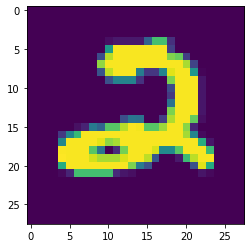

In [53]:
func = lambda a: np.argmax(a)
pred = np.array(list(map(func, y)))
plt.imshow(x_test[0])


In [50]:
ans = pd.DataFrame(pred)

In [52]:
ans.to_csv("ans.csv")